In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/pricing_discount_optimization.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Product ID                         500 non-null    object 
 1   Category                           500 non-null    object 
 2   Original Price                     500 non-null    float64
 3   Discount Offered (%)               500 non-null    int64  
 4   Discounted Price                   500 non-null    float64
 5   Sales Volume Before Discount       500 non-null    int64  
 6   Sales Volume After Discount        500 non-null    int64  
 7   Profit Margin Before Discount (%)  500 non-null    float64
 8   Profit Margin After Discount (%)   500 non-null    float64
 9   Competitor Prices                  500 non-null    float64
 10  Customer Feedback on Discounts     500 non-null    object 
dtypes: float64(5), int64(3), object(3)
memory usage: 43.1+ KB


(None,
   Product ID        Category  Original Price  Discount Offered (%)  \
 0      P1001  Home & Kitchen          431.70                    27   
 1      P1002  Home & Kitchen          189.53                    34   
 2      P1003         Apparel          812.39                    41   
 3      P1004  Home & Kitchen          607.73                     9   
 4      P1005     Electronics          191.45                    14   
 
    Discounted Price  Sales Volume Before Discount  \
 0            315.14                           169   
 1            125.09                            32   
 2            479.31                           435   
 3            553.03                           145   
 4            164.65                           426   
 
    Sales Volume After Discount  Profit Margin Before Discount (%)  \
 0                          210                              67.29   
 1                           34                              23.42   
 2                          6

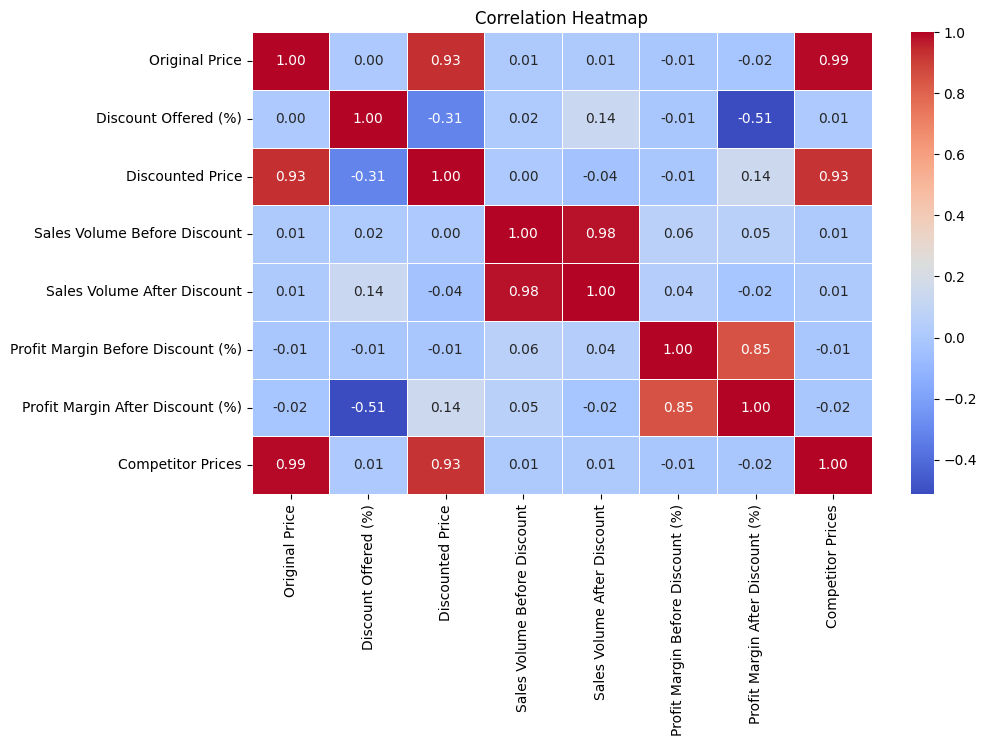

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=["number"])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode categorical variables
label_encoder = LabelEncoder()
df["Customer Feedback on Discounts"] = label_encoder.fit_transform(df["Customer Feedback on Discounts"])

# Define features (X) and target (y)
X = df.drop(columns=["Product ID", "Category", "Customer Feedback on Discounts"])
y = df["Customer Feedback on Discounts"]  # Target variable (discount effectiveness)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.59,
 array([[ 9, 14,  6],
        [ 7, 37,  3],
        [ 8,  3, 13]]),
 '              precision    recall  f1-score   support\n\n           0       0.38      0.31      0.34        29\n           1       0.69      0.79      0.73        47\n           2       0.59      0.54      0.57        24\n\n    accuracy                           0.59       100\n   macro avg       0.55      0.55      0.55       100\nweighted avg       0.57      0.59      0.58       100\n')

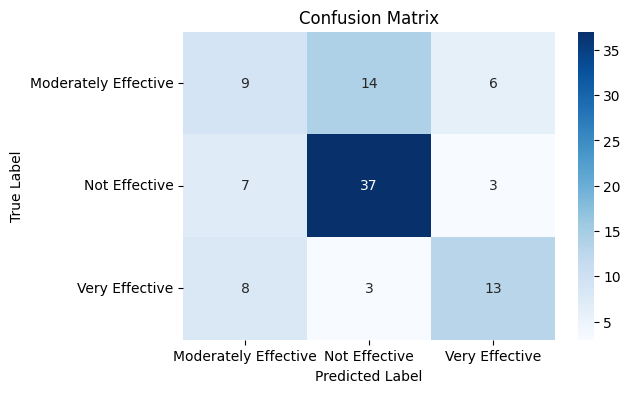

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
